In [4]:
!pip install fastf1 --quiet

In [5]:
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from fastf1 import plotting

# Plotting setup
plotting.setup_mpl()
sns.set_style("darkgrid")

pd.set_option("display.max_columns", None)

In [7]:
import os
import fastf1

# Create cache directory if it doesn't exist
cache_dir = "./fastf1_cache"
os.makedirs(cache_dir, exist_ok=True)

# Enable FastF1 cache
fastf1.Cache.enable_cache(cache_dir)

In [8]:
YEAR = 2023
RACE = "British Grand Prix"
SESSION = "R"   # R = Race, Q = Qualifying

session = fastf1.get_session(YEAR, RACE, SESSION)
session.load()

print(f"Loaded: {YEAR} {RACE} ({SESSION})")

core           INFO 	Loading data for British Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

Loaded: 2023 British Grand Prix (R)


In [9]:
session.event
session.weather_data.head()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:12.344000,22.1,51.0,1001.4,False,36.2,233,2.7
1,0 days 00:01:12.358000,22.3,50.0,1001.4,False,36.7,224,2.2
2,0 days 00:02:12.342000,22.4,50.0,1001.4,False,35.4,194,3.0
3,0 days 00:03:12.356000,22.3,50.0,1001.4,False,35.3,176,4.3
4,0 days 00:04:12.355000,22.1,52.0,1001.2,False,35.5,200,4.9


In [10]:
laps = session.laps
laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:03:46.121000,VER,1,0 days 00:01:37.167000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:38.051000,0 days 00:00:26.073000,NaT,0 days 01:03:20.151000,0 days 01:03:46.213000,300.0,254.0,246.0,296.0,False,MEDIUM,1.0,True,Red Bull Racing,0 days 01:02:08.731000,2023-07-09 14:03:09.767,1,2.0,False,,False,False
1,0 days 01:05:19.554000,VER,1,0 days 00:01:33.433000,2.0,1.0,NaT,NaT,0 days 00:00:29.616000,0 days 00:00:38,0 days 00:00:25.817000,0 days 01:04:15.751000,0 days 01:04:53.751000,0 days 01:05:19.568000,290.0,255.0,244.0,291.0,True,MEDIUM,2.0,True,Red Bull Racing,0 days 01:03:46.121000,2023-07-09 14:04:47.157,1,2.0,False,,False,True
2,0 days 01:06:52.284000,VER,1,0 days 00:01:32.730000,3.0,1.0,NaT,NaT,0 days 00:00:29.380000,0 days 00:00:37.690000,0 days 00:00:25.660000,0 days 01:05:48.948000,0 days 01:06:26.638000,0 days 01:06:52.298000,311.0,259.0,245.0,318.0,True,MEDIUM,3.0,True,Red Bull Racing,0 days 01:05:19.554000,2023-07-09 14:06:20.590,1,2.0,False,,False,True
3,0 days 01:08:25.064000,VER,1,0 days 00:01:32.780000,4.0,1.0,NaT,NaT,0 days 00:00:29.407000,0 days 00:00:37.650000,0 days 00:00:25.723000,0 days 01:07:21.705000,0 days 01:07:59.355000,0 days 01:08:25.078000,313.0,259.0,245.0,316.0,False,MEDIUM,4.0,True,Red Bull Racing,0 days 01:06:52.284000,2023-07-09 14:07:53.320,1,2.0,False,,False,True
4,0 days 01:09:57.646000,VER,1,0 days 00:01:32.582000,5.0,1.0,NaT,NaT,0 days 00:00:29.338000,0 days 00:00:37.403000,0 days 00:00:25.841000,0 days 01:08:54.416000,0 days 01:09:31.819000,0 days 01:09:57.660000,320.0,254.0,244.0,288.0,True,MEDIUM,5.0,True,Red Bull Racing,0 days 01:08:25.064000,2023-07-09 14:09:26.100,1,1.0,False,,False,True


In [11]:
laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [12]:
# Remove inaccurate laps (yellow flags, issues)
clean_laps = laps.pick_accurate()

# Remove outliers
clean_laps = clean_laps[clean_laps["LapTime"].notna()]

clean_laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 01:05:19.554000,VER,1,0 days 00:01:33.433000,2.0,1.0,NaT,NaT,0 days 00:00:29.616000,0 days 00:00:38,0 days 00:00:25.817000,0 days 01:04:15.751000,0 days 01:04:53.751000,0 days 01:05:19.568000,290.0,255.0,244.0,291.0,True,MEDIUM,2.0,True,Red Bull Racing,0 days 01:03:46.121000,2023-07-09 14:04:47.157,1,2.0,False,,False,True
2,0 days 01:06:52.284000,VER,1,0 days 00:01:32.730000,3.0,1.0,NaT,NaT,0 days 00:00:29.380000,0 days 00:00:37.690000,0 days 00:00:25.660000,0 days 01:05:48.948000,0 days 01:06:26.638000,0 days 01:06:52.298000,311.0,259.0,245.0,318.0,True,MEDIUM,3.0,True,Red Bull Racing,0 days 01:05:19.554000,2023-07-09 14:06:20.590,1,2.0,False,,False,True
3,0 days 01:08:25.064000,VER,1,0 days 00:01:32.780000,4.0,1.0,NaT,NaT,0 days 00:00:29.407000,0 days 00:00:37.650000,0 days 00:00:25.723000,0 days 01:07:21.705000,0 days 01:07:59.355000,0 days 01:08:25.078000,313.0,259.0,245.0,316.0,False,MEDIUM,4.0,True,Red Bull Racing,0 days 01:06:52.284000,2023-07-09 14:07:53.320,1,2.0,False,,False,True
4,0 days 01:09:57.646000,VER,1,0 days 00:01:32.582000,5.0,1.0,NaT,NaT,0 days 00:00:29.338000,0 days 00:00:37.403000,0 days 00:00:25.841000,0 days 01:08:54.416000,0 days 01:09:31.819000,0 days 01:09:57.660000,320.0,254.0,244.0,288.0,True,MEDIUM,5.0,True,Red Bull Racing,0 days 01:08:25.064000,2023-07-09 14:09:26.100,1,1.0,False,,False,True
5,0 days 01:11:30.673000,VER,1,0 days 00:01:33.027000,6.0,1.0,NaT,NaT,0 days 00:00:29.667000,0 days 00:00:37.543000,0 days 00:00:25.817000,0 days 01:10:27.327000,0 days 01:11:04.870000,0 days 01:11:30.687000,290.0,255.0,245.0,285.0,False,MEDIUM,6.0,True,Red Bull Racing,0 days 01:09:57.646000,2023-07-09 14:10:58.682,1,1.0,False,,False,True


In [13]:
drivers = clean_laps["Driver"].unique()
drivers

array(['VER', 'GAS', 'PER', 'ALO', 'LEC', 'STR', 'SAR', 'MAG', 'DEV',
       'TSU', 'ALB', 'ZHO', 'HUL', 'OCO', 'NOR', 'HAM', 'SAI', 'RUS',
       'BOT', 'PIA'], dtype=object)

In [14]:
DRIVER = "VER"  # Change this freely (HAM, NOR, LEC, etc.)

driver_laps = clean_laps.pick_driver(DRIVER)
driver_laps.head()

/opt/anaconda3/lib/python3.13/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 01:05:19.554000,VER,1,0 days 00:01:33.433000,2.0,1.0,NaT,NaT,0 days 00:00:29.616000,0 days 00:00:38,0 days 00:00:25.817000,0 days 01:04:15.751000,0 days 01:04:53.751000,0 days 01:05:19.568000,290.0,255.0,244.0,291.0,True,MEDIUM,2.0,True,Red Bull Racing,0 days 01:03:46.121000,2023-07-09 14:04:47.157,1,2.0,False,,False,True
2,0 days 01:06:52.284000,VER,1,0 days 00:01:32.730000,3.0,1.0,NaT,NaT,0 days 00:00:29.380000,0 days 00:00:37.690000,0 days 00:00:25.660000,0 days 01:05:48.948000,0 days 01:06:26.638000,0 days 01:06:52.298000,311.0,259.0,245.0,318.0,True,MEDIUM,3.0,True,Red Bull Racing,0 days 01:05:19.554000,2023-07-09 14:06:20.590,1,2.0,False,,False,True
3,0 days 01:08:25.064000,VER,1,0 days 00:01:32.780000,4.0,1.0,NaT,NaT,0 days 00:00:29.407000,0 days 00:00:37.650000,0 days 00:00:25.723000,0 days 01:07:21.705000,0 days 01:07:59.355000,0 days 01:08:25.078000,313.0,259.0,245.0,316.0,False,MEDIUM,4.0,True,Red Bull Racing,0 days 01:06:52.284000,2023-07-09 14:07:53.320,1,2.0,False,,False,True
4,0 days 01:09:57.646000,VER,1,0 days 00:01:32.582000,5.0,1.0,NaT,NaT,0 days 00:00:29.338000,0 days 00:00:37.403000,0 days 00:00:25.841000,0 days 01:08:54.416000,0 days 01:09:31.819000,0 days 01:09:57.660000,320.0,254.0,244.0,288.0,True,MEDIUM,5.0,True,Red Bull Racing,0 days 01:08:25.064000,2023-07-09 14:09:26.100,1,1.0,False,,False,True
5,0 days 01:11:30.673000,VER,1,0 days 00:01:33.027000,6.0,1.0,NaT,NaT,0 days 00:00:29.667000,0 days 00:00:37.543000,0 days 00:00:25.817000,0 days 01:10:27.327000,0 days 01:11:04.870000,0 days 01:11:30.687000,290.0,255.0,245.0,285.0,False,MEDIUM,6.0,True,Red Bull Racing,0 days 01:09:57.646000,2023-07-09 14:10:58.682,1,1.0,False,,False,True


In [15]:
stints = (
    driver_laps[["Stint", "Compound", "LapNumber"]]
    .groupby(["Stint", "Compound"])
    .count()
    .reset_index()
)

stints.rename(columns={"LapNumber": "LapsOnStint"}, inplace=True)
stints

,Stint,Compound,LapsOnStint
0,1.0,MEDIUM,31
1,2.0,SOFT,14


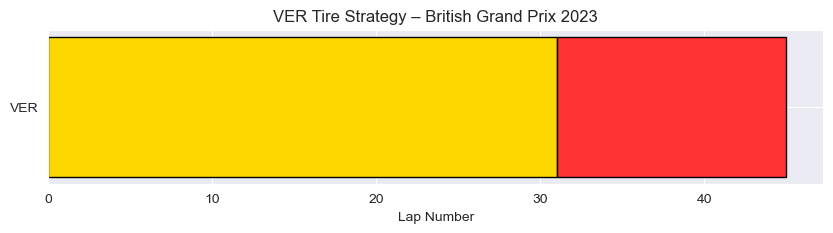

In [17]:
# Define compound colors manually (FastF1 version-safe)
COMPOUND_COLORS = {
    "SOFT": "#FF3333",
    "MEDIUM": "#FFD700",
    "HARD": "#FFFFFF",
    "INTERMEDIATE": "#39FF14",
    "WET": "#1E90FF"
}

plt.figure(figsize=(10, 2))

start = 0
for _, row in stints.iterrows():
    compound = row["Compound"]
    
    plt.barh(
        y=DRIVER,
        width=row["LapsOnStint"],
        left=start,
        color=COMPOUND_COLORS.get(compound, "gray"),
        edgecolor="black"
    )
    
    start += row["LapsOnStint"]

plt.title(f"{DRIVER} Tire Strategy – {RACE} {YEAR}")
plt.xlabel("Lap Number")
plt.show()

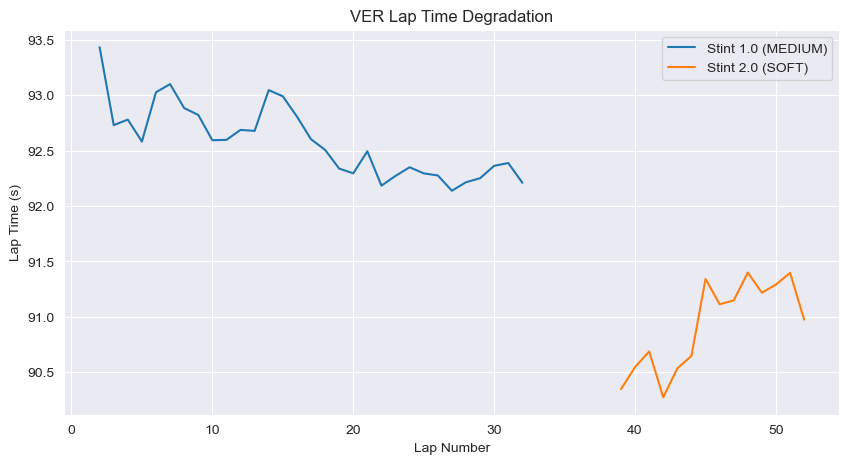

In [18]:
plt.figure(figsize=(10, 5))

for stint in driver_laps["Stint"].unique():
    stint_laps = driver_laps[driver_laps["Stint"] == stint]
    
    plt.plot(
        stint_laps["LapNumber"],
        stint_laps["LapTime"].dt.total_seconds(),
        label=f"Stint {stint} ({stint_laps['Compound'].iloc[0]})"
    )

plt.xlabel("Lap Number")
plt.ylabel("Lap Time (s)")
plt.title(f"{DRIVER} Lap Time Degradation")
plt.legend()
plt.show()

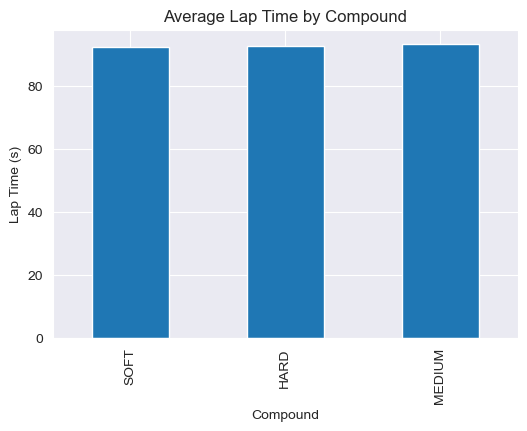

In [19]:
compound_avg = (
    clean_laps
    .groupby("Compound")["LapTime"]
    .mean()
    .dt.total_seconds()
    .sort_values()
)

compound_avg

compound_avg.plot(kind="bar", figsize=(6,4), title="Average Lap Time by Compound")
plt.ylabel("Lap Time (s)")
plt.show()

In [20]:
pit_laps = driver_laps[driver_laps["PitInTime"].notna()]
pit_laps[["LapNumber", "PitInTime", "PitOutTime"]]

,LapNumber,PitInTime,PitOutTime


In [22]:
track_status = clean_laps[["LapNumber", "TrackStatus"]].drop_duplicates()
track_status.head()

track_status["TrackStatus"].value_counts()

TrackStatus
1    45
Name: count, dtype: int64

/opt/anaconda3/lib/python3.13/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


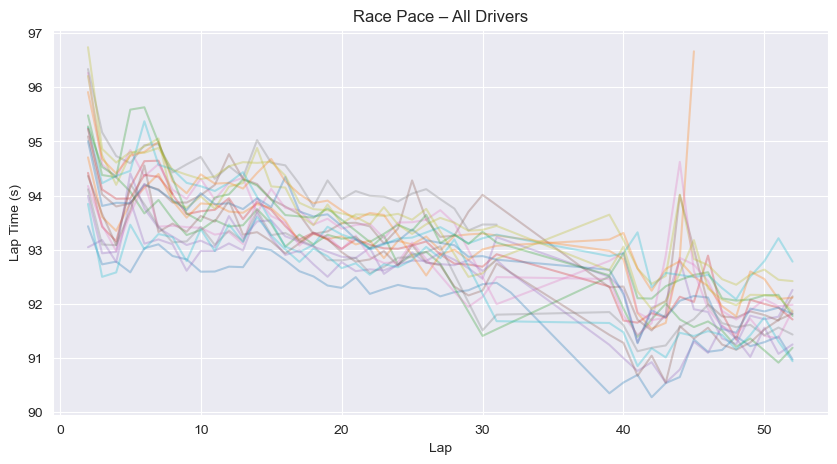

In [23]:
plt.figure(figsize=(10, 5))

for drv in drivers:
    drv_laps = clean_laps.pick_driver(drv)
    plt.plot(
        drv_laps["LapNumber"],
        drv_laps["LapTime"].dt.total_seconds(),
        alpha=0.3
    )

plt.xlabel("Lap")
plt.ylabel("Lap Time (s)")
plt.title("Race Pace – All Drivers")
plt.show()

In [26]:
import os

# Create the directory if it doesn't exist
os.makedirs("F1 Strategy Simulator/Notebooks", exist_ok=True)

# Now save the file
clean_laps.to_csv("F1 Strategy Simulator/Notebooks/clean_laps.csv", index=False)
print("Saved clean_laps.csv")

Saved clean_laps.csv
